# Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Paths

In [2]:
ROOT_PATH = Path.cwd().parent
MODELS_PATH = ROOT_PATH / 'Models'
PREDICTIONS_PATH = ROOT_PATH / 'Predictions'

# Functions

In [3]:
def plot_loss(hist):

    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data=hist, x='epoch', y='Train Loss', label='Train Loss', ax=ax)
    sns.lineplot(data=hist, x='epoch', y='Valid Loss', label='Valid Loss', legend=True, ax=ax).set_title('Loss')

def plot_auroc(hist):

    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data=hist, x='epoch', y='Train AUROC', label='Train auroc', ax=ax)
    sns.lineplot(data=hist, x='epoch', y='Valid AUROC', label='Valid auroc', legend=True, ax=ax).set_title('AUROC')

def plot_lr(hist):

    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(5,5))
    sns.lineplot(data=hist, x='epoch', y='lr', ax=ax).set_title('Learning Rate')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# History viewer

In [4]:
model_name = 'convnext_small.fb_in1k'
file = 'history.json'

with open(MODELS_PATH / model_name / file,'r') as json_file:
    history = json.load(json_file)

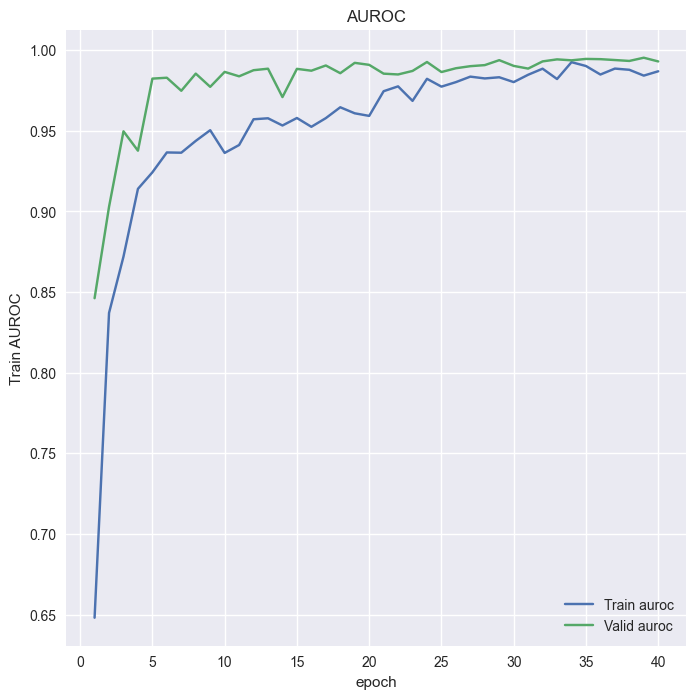

In [5]:
plot_auroc(history)

# Correlation of Predictions

In [29]:
predictions = [file_path for file_path in PREDICTIONS_PATH.glob('*.csv')]

predictions_df = pd.DataFrame()

for idx, pred in enumerate(predictions):

    if idx == 0:
        predictions_df = pd.read_csv(pred, header=0, names=['id','label_0'])
    else:
        df = pd.read_csv(pred, header=0, names=['id','label_' + str(idx)])
        predictions_df = predictions_df.merge(df, on='id', how='inner')


<Axes: >

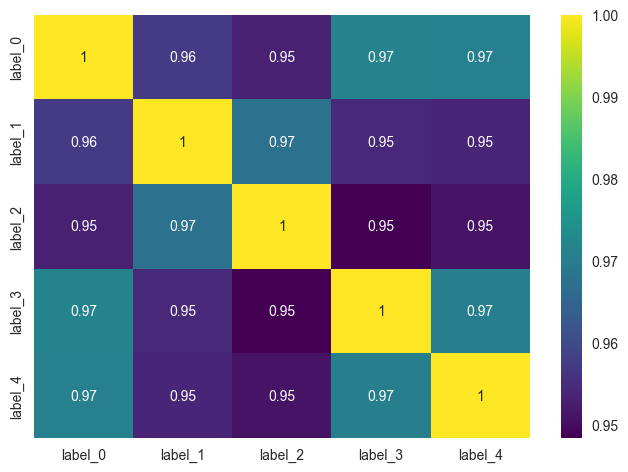

In [30]:
sns.heatmap(predictions_df.drop('id', axis=1).corr(), cmap='viridis', annot=True)